In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)
pd.options.display.max_colwidth = 30

/Users/leejaeuk/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
votes = pd.read_csv('./complete_data/validator_votes.csv').drop(columns='Unnamed: 0')
votes

/var/folders/nc/dhlk15l910g4hrbcq92y1cy40000gn/T/ipykernel_5694/3495828067.py:1: DtypeWarning: Columns (2,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,61,63,64,65,67,68,69,70,71,72,73,74,75,76,77,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,

,voter,osmosis_1,osmosis,osmosis_3,osmosis_5,osmosis_7,osmosis_22,osmosis_24,osmosis_29,osmosis_39,osmosis_50,osmosis_51,osmosis_55,osmosis_57,osmosis_58,osmosis_62,osmosis_72,osmosis_74,osmosis_76,osmosis_81,osmosis_82,osmosis_84,osmosis_96,osmosis_109,osmosis_111,osmosis_114,osmosis_120,osmosis_123,osmosis_130,osmosis_132,osmosis_133,osmosis_134,osmosis_135,osmosis_140,osmosis_141,osmosis_144,osmosis_146,osmosis_148,osmosis_149,osmosis_151,osmosis_152,osmosis_153,osmosis_156,osmosis_159,osmosis_163,osmosis_165,osmosis_166,osmosis_169,osmosis_170,osmosis_171,osmosis_173,osmosis_178,osmosis_180,osmosis_188,osmosis_190,osmosis_191,osmosis_211,osmosis_306,juno_4,juno,stargaze_11,stargaze,stargaze_15,juno_16,akash_16,akash,stargaze_16,stargaze_17,juno_18,juno_19,juno_20,stargaze_50,akash_52,stargaze_57,stargaze_58,stargaze_59,cosmos_60,cosmos,cosmos_63,cosmos_69,juno_72,cosmos_72,cosmos_75,cosmos_76,cosmos_77,cosmos_78,cosmos_79,cosmos_80,cosmos_81,stargaze_81,cosmos_82,juno_83,cosmos_83,juno_85,cosmos_86,cosmos_89,cosmos_90,cosmos_93,cosmos_94,stargaze_94,cosmos_99,cosmos_101,stargaze_104,juno_125,juno_141,osmosis_162,akash_182,akash_185,akash_187,osmosis_194,osmosis_195,osmosis_199,osmosis_200,osmosis_204,osmosis_206,osmosis_207,osmosis_208,osmosis_209,osmosis_216,osmosis_220,akash_229,akash_232,osmosis_232,akash_233,akash_234,akash_236,osmosis_237,akash_242,akash_243,akash_244,akash_245,akash_246,akash_247,akash_250,osmosis_251,akash_252,akash_253,akash_254,akash_255,osmosis_256,akash_261,osmosis_261,osmosis_262,akash_263,akash_266,osmosis_267,akash_268,osmosis_270,osmosis_271,osmosis_273,juno_284,juno_292,osmosis_305,juno_307,osmosis_309,osmosis_315,osmosis_316,osmosis_323,osmosis_326,osmosis_339,osmosis_342,osmosis_343,osmosis_349,osmosis_350,osmosis_362,osmosis_365,osmosis_367,osmosis_372,osmosis_378,osmosis_386,osmosis_388,osmosis_389,osmosis_390,osmosis_400,osmosis_402,osmosis_403,osmosis_419,osmosis_420,osmosis_421,osmosis_436,osmosis_442,osmosis_444,osmosis_451,osmosis_457,osmosis_480,osmosis_482,osmosis_492,osmosis_497,osmosis_498,osmosis_519,osmosis_530,osmosis_561,osmosis_564,osmosis_593,osmosis_610,osmosis_620,osmosis_638,osmosis_639,osmosis_640,osmosis_641,osmosis_645,osmosis_652,osmosis_655,cosmos_687,osmosis_688,osmosis_694,osmosis_700,osmosis_706,osmosis_707,osmosis_712,osmosis_741,osmosis_742,osmosis_755,osmosis_764,osmosis_785,cosmos_787,cosmos_791,cosmos_793,cosmos_800,cosmos_811,cosmos_814,cosmos_818,cosmos_826,cosmos_827,cosmos_836,cosmos_839,cosmos_848,cosmos_851,cosmos_853,cosmos_856,cosmos_858,cosmos_861,cosmos_862,cosmos_865,cosmos_867,cosmos_868,cosmos_895,cosmos_899,cosmos_912,cosmos_916,cosmos_917,cosmos_946,cosmos_952,cosmos_954,cosmos_956,osmosis_276,osmosis_277,osmosis_320,osmosis_352,osmosis_376,osmosis_394,osmosis_406,osmosis_417,osmosis_464,dydx_6,dydx,juno_7,akash_9,akash_14,juno_15,akash_22,akash_23,akash_24,iris_24,iris,dydx_24,iris_25,iris_26,akash_26,akash_28,iris_28,axelar_29,axelar,juno_30,akash_31,stargaze_35,juno_39,iris_41,dydx_44,iris_47,dydx_47,iris_48,dydx_48,iris_52,juno_59,juno_60,akash_63,cosmos_68,cosmos_73,iris_73,iris_74,cosmos_74,iris_76,iris_77,iris_78,iris_79,iris_84,iris_89,juno_89,cosmos_95,cosmos_98,stargaze_101,cosmos_103,cosmos_104,stargaze_128,dydx_138,dydx_142,stargaze_144,dydx_144,dydx_154,cosmos_155,dydx_156,dydx_157,dydx_164,dydx_165,axelar_166,axelar_167,axelar_168,axelar_169,axelar_170,axelar_171,axelar_172,injective_173,injective,axelar_174,dydx_175,dydx_176,axelar_178,axelar_188,axelar_190,axelar_191,axelar_192,axelar_193,injective_193,axelar_194,axelar_196,akash_199,axelar_199,akash_200,stargaze_200,axelar_200,axelar_201,cosmos_202,axelar_204,stargaze_205,axelar_206,akash_206,axelar_207,akash_207,akash_208,axelar_208,axelar_209,stargaze_210,axelar_211,axelar_212,axelar_213,stargaze_213,axelar_215,akash_216,axelar_216,axelar_217,axelar_218,axelar_219,axelar_220,axelar_222,axelar_223,stargaze_223,injective_226,stargaze_226,akash_230,akash_235,axelar_239,axelar

In [3]:
chain_list = [
    'cosmos', 'kava', 'injective', 'axelar', 'osmosis', 'terra',
    'iris', 'dydx', 'secret', 'akash', 'stargaze', 'gravity-bridge',
    'sentinel', 'juno'
]

chain_dfs = {}

# Process each chain
for chain in chain_list:
    # Select rows where the chain column equals 1
    chain_df = votes[votes[chain] == 1]
    relevant_columns = ['voter'] + [col for col in votes.columns if col.startswith(f"{chain}_")] + ['cluster_label']
    chain_df = chain_df[relevant_columns].reset_index(drop=True)
    
    # Store the resulting DataFrame in the dictionary
    chain_dfs[chain] = chain_df

# Display the resulting DataFrame structure for one chain as an example
chain_dfs['cosmos']

,voter,cosmos_60,cosmos_63,cosmos_69,cosmos_72,cosmos_75,cosmos_76,cosmos_77,cosmos_78,cosmos_79,cosmos_80,cosmos_81,cosmos_82,cosmos_83,cosmos_86,cosmos_89,cosmos_90,cosmos_93,cosmos_94,cosmos_99,cosmos_101,cosmos_687,cosmos_787,cosmos_791,cosmos_793,cosmos_800,cosmos_811,cosmos_814,cosmos_818,cosmos_826,cosmos_827,cosmos_836,cosmos_839,cosmos_848,cosmos_851,cosmos_853,cosmos_856,cosmos_858,cosmos_861,cosmos_862,cosmos_865,cosmos_867,cosmos_868,cosmos_895,cosmos_899,cosmos_912,cosmos_916,cosmos_917,cosmos_946,cosmos_952,cosmos_954,cosmos_956,cosmos_68,cosmos_73,cosmos_74,cosmos_95,cosmos_98,cosmos_103,cosmos_104,cosmos_155,cosmos_202,cosmos_717,cosmos_796,cosmos_920,cosmos_922,cosmos_930,cosmos_52,cosmos_42,cosmos_44,cosmos_45,cluster_label
0,Chainflow,ABSTAIN,YES,NO,NO,YES,YES,YES,ABSTAIN,YES,NO,NO,NO,NO,NO,YES,ABSTAIN,YES,YES,YES,YES,YES,ABSTAIN,ABSTAIN,ABSTAIN,ABSTAIN,NO,YES,NO,YES,ABSTAIN,YES,NO,YES,YES,ABSTAIN,NO,YES,YES,YES,YES,YES,ABSTAIN,ABSTAIN,YES,ABSTAIN,NO,YES,ABSTAIN,ABSTAIN,YES,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
1,Imperatorco,ABSTAIN,NaN,NO,YES,ABSTAIN,NO,YES,NO,ABSTAIN,NO,NO,NO_WITH_VETO,NO,ABSTAIN,NO,NO,ABSTAIN,YES,ABSTAIN,YES,YES,NO,NO,ABSTAIN,YES,NO,YES,NO,ABSTAIN,NO,NO,YES,WEIGHTED_VOTE,YES,NO,NO,YES,ABSTAIN,YES,ABSTAIN,YES,ABSTAIN,YES,ABSTAIN,YES,YES,YES,ABSTAIN,NO_WITH_VETO,ABSTAIN,NO,YES,NO_WITH_VETO,YES,ABSTAIN,ABSTAIN,NO,NO,NO,ABSTAIN,YES,ABSTAIN,ABSTAIN,YES,YES,NaN,NaN,NaN,NaN,3
2,StakeWithUs,NaN,YES,NO,ABSTAIN,ABSTAIN,ABSTAIN,YES,NO,YES,NO,NO,NO_WITH_VETO,NO,ABSTAIN,ABSTAIN,ABSTAIN,YES,YES,ABSTAIN,NaN,YES,ABSTAIN,NO,YES,YES,NO,YES,NO,YES,YES,ABSTAIN,ABSTAIN,YES,YES,YES,NO,NaN,YES,NaN,ABSTAIN,YES,YES,ABSTAIN,YES,ABSTAIN,NO,YES,NO,ABSTAIN,YES,NaN,YES,NO_WITH_VETO,YES,NaN,NaN,YES,NaN,ABSTAIN,NO,ABSTAIN,ABSTAIN,ABSTAIN,ABSTAIN,NaN,YES,NaN,NaN,NaN,3
3,Staking Fund,NaN,ABSTAIN,YES,ABSTAIN,ABSTAIN,NaN,YES,ABSTAIN,NO,NO,NO,NO_WITH_VETO,NO,NaN,YES,NO,ABSTAIN,YES,ABSTAIN,NO,NaN,NaN,NO,ABSTAIN,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ABSTAIN,ABSTAIN,YES,YES,NO,YES,ABSTAIN,NO,NO,YES,NaN,NaN,NaN,NaN,NO,YES,YES,YES,7
4,BHarvest,NaN,YES,ABSTAIN,NaN,ABSTAIN,NO,YES,ABSTAIN,YES,NO,NO,NO_WITH_VETO,NO,NO,NO,NO,YES,YES,ABSTAIN,NO,YES,YES,NO,ABSTAIN,YES,NO,YES,NO,YES,YES,YES,YES,YES,YES,NO,NO,YES,NO,YES,YES,YES,NO,NO,YES,YES,NO,YES,NaN,NaN,NaN,NaN,YES,NO,YES,YES,NO,YES,ABSTAIN,YES,YES,YES,ABSTAIN,YES,ABSTAIN,NaN,NO,YES,YES,YES,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,CloudByte,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
277,genznodes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,YES,NO_VOTE,NO_VOTE,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,YES,NaN,NaN,NaN,NaN,7
278,authztestvalidator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,YES,NaN,NaN,NaN,NaN,2
279,NodeStake LottoDrop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ABSTAIN,NO_WITH_VETO,YES,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7


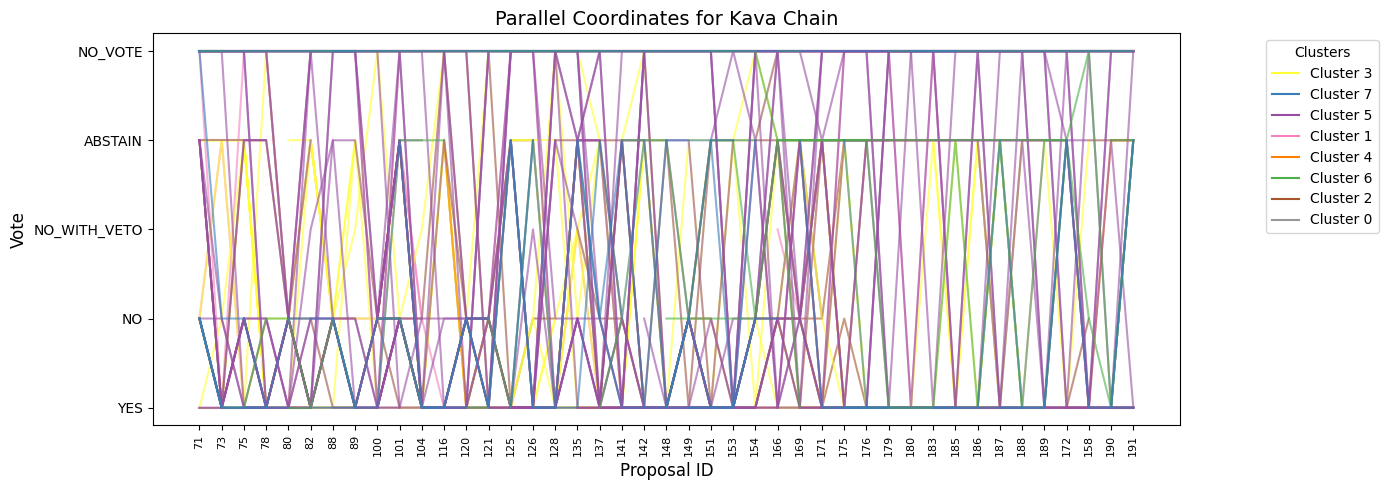

In [10]:
# Select a chain for visualization
selected_chain = 'kava'
selected_chain_df = chain_dfs[selected_chain]

# Prepare data for matplotlib
# Convert to a long format for plotting
long_df = selected_chain_df.melt(
    id_vars=['voter', 'cluster_label'],
    value_vars=[col for col in selected_chain_df.columns if col.startswith(f"{selected_chain}_")],
    var_name='Proposal ID',
    value_name='Vote'
)

# Map votes to numerical values for plotting
vote_mapping = {'YES': 1, 'NO': 2, 'NO_WITH_VETO': 3, 'ABSTAIN': 4, 'NO_VOTE': 5}
long_df['Vote'] = long_df['Vote'].map(vote_mapping)

# Extract numeric parts from Proposal ID and convert to categorical type
long_df['Proposal ID'] = long_df['Proposal ID'].str.extract(r'_(\d+)$')[0].astype(str)

# Plot using matplotlib with simplified legend (one color per cluster)
plt.figure(figsize=(12, 5))
cluster_colors = plt.cm.Set1_r.colors  # Colormap for cluster colors
cluster_color_map = {cluster: cluster_colors[int(cluster) % len(cluster_colors)] 
                     for cluster in long_df['cluster_label'].unique()}

for cluster, group in long_df.groupby('cluster_label'):
    for _, voter_group in group.groupby('voter'):
        plt.plot(
            voter_group['Proposal ID'].to_numpy(),
            voter_group['Vote'].to_numpy(),
            color=cluster_color_map[cluster],
            alpha=0.6
        )

# Customize the plot
plt.xticks(rotation=90, fontsize=8)
plt.yticks([1, 2, 3, 4, 5], ['YES', 'NO', 'NO_WITH_VETO', 'ABSTAIN', 'NO_VOTE'])
plt.title(f"Parallel Coordinates for {selected_chain.capitalize()} Chain", fontsize=14)
plt.xlabel("Proposal ID", fontsize=12)
plt.ylabel("Vote", fontsize=12)
plt.tight_layout()

# Add a simplified legend
for cluster, color in cluster_color_map.items():
    plt.plot([], [], color=color, label=f"Cluster {cluster}")
plt.legend(title="Clusters", loc='upper right', bbox_to_anchor=(1.2, 1))

plt.show()


In [6]:
for chain in chain_list:
    pd.DataFrame(chain_dfs[chain]).to_csv(f'./complete_data/parallel_data/parallel_{chain}.csv', index=False)
    pd.DataFrame(chain_dfs[chain]).to_json(f'./complete_data/parallel_data/parallel_{chain}.json', index=False, orient='records')

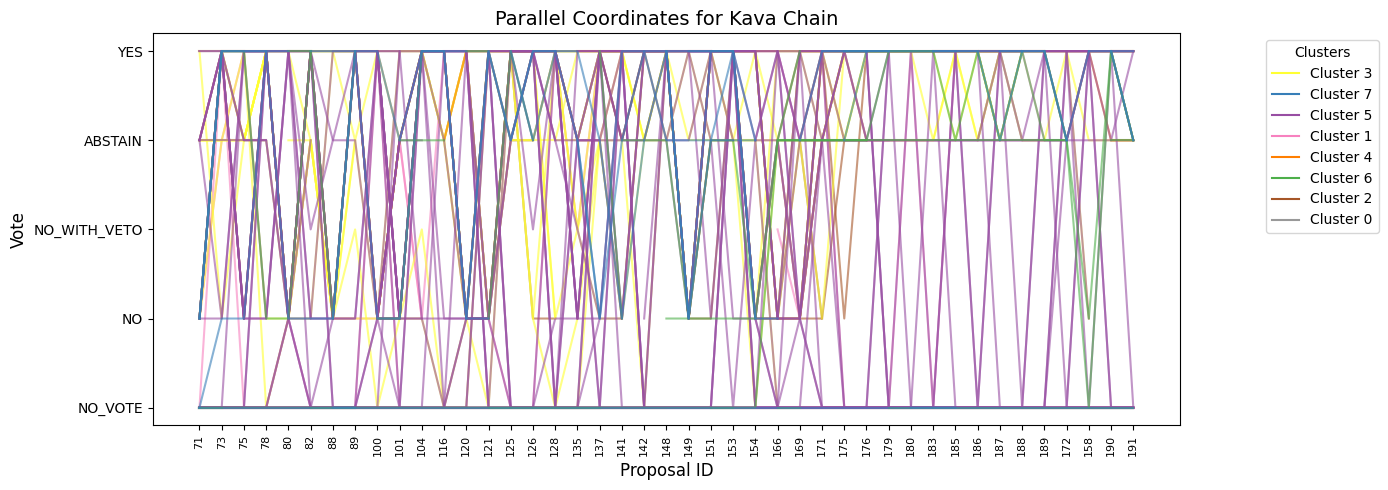

In [9]:
# Select a chain for visualization
selected_chain = 'kava'
selected_chain_df = chain_dfs[selected_chain]

# Prepare data for matplotlib
# Convert to a long format for plotting
long_df = selected_chain_df.melt(
    id_vars=['voter', 'cluster_label'],
    value_vars=[col for col in selected_chain_df.columns if col.startswith(f"{selected_chain}_")],
    var_name='Proposal ID',
    value_name='Vote'
)

# Map votes to numerical values for plotting
vote_mapping = {'YES': 5, 'NO': 2, 'NO_WITH_VETO': 3, 'ABSTAIN': 4, 'NO_VOTE': 1}
long_df['Vote'] = long_df['Vote'].map(vote_mapping)

# Extract numeric parts from Proposal ID and convert to categorical type
long_df['Proposal ID'] = long_df['Proposal ID'].str.extract(r'_(\d+)$')[0].astype(str)

# Plot using matplotlib with simplified legend (one color per cluster)
plt.figure(figsize=(12, 5))
cluster_colors = plt.cm.Set1_r.colors  # Colormap for cluster colors
cluster_color_map = {cluster: cluster_colors[int(cluster) % len(cluster_colors)] 
                     for cluster in long_df['cluster_label'].unique()}

for cluster, group in long_df.groupby('cluster_label'):
    for _, voter_group in group.groupby('voter'):
        plt.plot(
            voter_group['Proposal ID'].to_numpy(),
            voter_group['Vote'].to_numpy(),
            color=cluster_color_map[cluster],
            alpha=0.6
        )

# Customize the plot
        

plt.xticks(rotation=90, fontsize=8)
plt.yticks([1, 2, 3, 4, 5], ['NO_VOTE', 'NO', 'NO_WITH_VETO', 'ABSTAIN', 'YES'])
plt.title(f"Parallel Coordinates for {selected_chain.capitalize()} Chain", fontsize=14)
plt.xlabel("Proposal ID", fontsize=12)
plt.ylabel("Vote", fontsize=12)
plt.tight_layout()

# Add a simplified legend
for cluster, color in cluster_color_map.items():
    plt.plot([], [], color=color, label=f"Cluster {cluster}")
plt.legend(title="Clusters", loc='upper right', bbox_to_anchor=(1.2, 1))

plt.show()
